In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib  as plt


import numpy
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import statistics as stat

In [18]:
data=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Fruits.csv")

In [19]:
data.head(5)

,Color,Weight(g),Size,Fruits
0,Red,70,Small,Apple
1,Red,100,Big,Apple
2,Orange,28,Medium,Plums
3,Red,3,Small,Cherry
4,Green,100,Big,Apple


In [20]:
data.tail(5)

,Color,Weight(g),Size,Fruits
25,Red,7,Small,Cherry
26,Green,28,Medium,Plums
27,Green,100,Big,Apple
28,Red,27,Medium,Plums
29,Red,27,Medium,Plums


In [21]:
data.columns

Index(['Color', 'Weight(g)', 'Size', 'Fruits'], dtype='object')

In [22]:
x=data[['Color', 'Weight(g)', 'Size']]
y=data['Fruits']

In [23]:
print(x.shape)
print(y.shape)

(30, 3)
(30,)


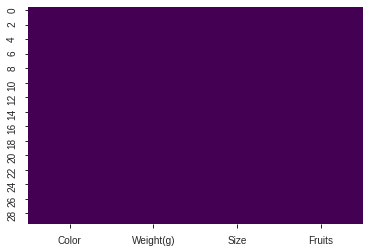

In [25]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [26]:
data.isnull().sum()

Color        0
Weight(g)    0
Size         0
Fruits       0
dtype: int64

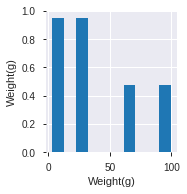

In [27]:
sns.pairplot(data)

In [28]:
pandas_profiling.ProfileReport(data)

In [33]:
#label Encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

#convert string labels into number
color_encoded=le.fit_transform(data.Color)
print(data.Color)
print(color_encoded)

0        Red
1        Red
2     Orange
3        Red
4      Green
5        Red
6        Red
7      Green
8      Green
9        Red
10     Green
11       Red
12       Red
13       Red
14       Red
15       Red
16    Orange
17       Red
18    Orange
19       Red
20       Red
21       Red
22       Red
23     Green
24    Orange
25       Red
26     Green
27     Green
28       Red
29       Red
Name: Color, dtype: object
[2 2 1 2 0 2 2 0 0 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 1 2 0 0 2 2]


In [34]:
#convert string labels into number
color_encoded1=le.fit_transform(data.Fruits)
print(data.Fruits)
print(color_encoded1)

0      Apple
1      Apple
2      Plums
3     Cherry
4      Apple
5      Apple
6     Cherry
7      Apple
8      Apple
9     Cherry
10     Plums
11    Cherry
12     Plums
13    Cherry
14     Apple
15     Plums
16     Plums
17    Cherry
18     Plums
19    Cherry
20     Apple
21    Cherry
22    Cherry
23     Apple
24     Plums
25    Cherry
26     Plums
27     Apple
28     Plums
29     Plums
Name: Fruits, dtype: object
[0 0 2 1 0 0 1 0 0 1 2 1 2 1 0 2 2 1 2 1 0 1 1 0 2 1 2 0 2 2]


In [35]:
color_encoded2=le.fit_transform(data.Size)
print(data.Size)
print(color_encoded2)

0      Small
1        Big
2     Medium
3      Small
4        Big
5        Big
6      Small
7      Small
8      Small
9      Small
10    Medium
11     Small
12    Medium
13     Small
14     Small
15    Medium
16    Medium
17     Small
18    Medium
19     Small
20       Big
21     Small
22     Small
23     Small
24    Medium
25     Small
26    Medium
27       Big
28    Medium
29    Medium
Name: Size, dtype: object
[2 0 1 2 0 0 2 2 2 2 1 2 1 2 2 1 1 2 1 2 0 2 2 2 1 2 1 0 1 1]


In [36]:
weight=data['Weight(g)']

In [37]:
features=list(zip(color_encoded,weight,color_encoded2))
features=np.array(features,dtype=np.float)
features

array([[  2.,  70.,   2.],
       [  2., 100.,   0.],
       [  1.,  28.,   1.],
       [  2.,   3.,   2.],
       [  0., 100.,   0.],
       [  2., 100.,   0.],
       [  2.,   3.,   2.],
       [  0.,  70.,   2.],
       [  0.,  70.,   2.],
       [  2.,   7.,   2.],
       [  0.,  27.,   1.],
       [  2.,   7.,   2.],
       [  2.,  28.,   1.],
       [  2.,   7.,   2.],
       [  2.,  70.,   2.],
       [  2.,  27.,   1.],
       [  1.,  28.,   1.],
       [  2.,   3.,   2.],
       [  1.,  28.,   1.],
       [  2.,   7.,   2.],
       [  2., 100.,   0.],
       [  2.,   3.,   2.],
       [  2.,   7.,   2.],
       [  0.,  70.,   2.],
       [  1.,  28.,   1.],
       [  2.,   7.,   2.],
       [  0.,  28.,   1.],
       [  0., 100.,   0.],
       [  2.,  27.,   1.],
       [  2.,  27.,   1.]])

In [38]:
#target or label
label=le.fit_transform(color_encoded1)
print(color_encoded1)
label

[0 0 2 1 0 0 1 0 0 1 2 1 2 1 0 2 2 1 2 1 0 1 1 0 2 1 2 0 2 2]


array([0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 2, 1, 2, 0, 2, 2])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,random_state=1)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22, 3)
(22,)
(8, 3)
(8,)


In [43]:
# A simple average ensemble model
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(kernel='rbf',probability=True)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
# lets look at the accuracy for each model
score1=model1.score(x_test,y_test)
print(score1)

1.0


In [45]:
# lets look at the accuracy for each model
score2=model2.score(x_test,y_test)
print(score2)

1.0


In [46]:
# lets look at the accuracy for each model
score3=model3.score(x_test,y_test)
print(score3)

1.0


In [47]:
# prediciton process
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

In [48]:
final_pred=np.array([])
for i in range(0,len(x_test)):
    final_pred=np.append(final_pred,stat.mode([pred1[i],
                                              pred2[i],
                                              pred3[i]]))
final_pred

array([1., 1., 2., 1., 0., 0., 2., 1.])

In [49]:
total=np.sum(y_test==final_pred)
print("accuracy",total,"/",len(final_pred),"*100=","{0:.3f}".format(total/len(final_pred)*100),"%")

accuracy 8 / 8 *100= 100.000 %


In [50]:
#soft voting in python
spred1=model1.predict_proba(x_test)
spred2=model2.predict_proba(x_test)
spred3=model3.predict_proba(x_test)
finalpred=(spred1+spred2+spred3)/3
finalpred

array([[0.02140706, 0.9165456 , 0.06204734],
       [0.02140706, 0.9165456 , 0.06204734],
       [0.02342515, 0.03317504, 0.94339981],
       [0.02163006, 0.90382452, 0.07454543],
       [0.94886493, 0.01543196, 0.0357031 ],
       [0.94452005, 0.02351436, 0.0319656 ],
       [0.02472054, 0.02836518, 0.94691428],
       [0.02140706, 0.9165456 , 0.06204734]])

In [51]:
final_class=finalpred.argmax(axis=-1)
final_class


array([1, 1, 2, 1, 0, 0, 2, 1])

In [52]:
# we can applay for the volting process
emodel=VotingClassifier(estimators=[('dt',model1),('knn',model2),('svc',model3)],voting='soft')
emodel.fit(x_train,y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
      

In [53]:
#accuracy score for the ensemble modelis
escore=emodel.score(x_test,y_test)
print(escore)

1.0


In [54]:
emodel.classes_

array([0, 1, 2])